# Tutorial: Loading & Visualizing Audio with librosa

This tutorial introduces you to **librosa**, a powerful Python library for audio analysis. You'll learn how to load audio files and create visualizations that reveal the structure of sound—skills fundamental to computational music analysis.

**What you'll learn:**
- How to load audio files into Python
- How to visualize audio as waveforms
- How to create spectrograms that show frequency content over time
- How to use Mel spectrograms for perceptually-meaningful analysis

## Step 1: Setup

First, let's install and import the libraries we need. This may take a minute to run.

In [ ]:
# Install required libraries
!pip install librosa soundfile

# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

print("Libraries loaded successfully!")

## Step 2: Load an Audio File

librosa makes loading audio simple. The `librosa.load()` function returns two things:
- **y**: The audio signal as a NumPy array (a sequence of numbers representing the waveform)
- **sr**: The sample rate (how many samples per second)

We'll use one of librosa's built-in example files—a trumpet sound.

In [ ]:
# Load a built-in example (trumpet sound)
y, sr = librosa.load(librosa.ex('trumpet'))

# Print basic information about the audio
print(f"Sample rate: {sr} Hz")
print(f"Duration: {len(y) / sr:.2f} seconds")
print(f"Number of samples: {len(y)}")

# Listen to the audio
Audio(y, rate=sr)

### Understanding Sample Rate

The sample rate tells us how many "snapshots" of the sound wave were taken per second. CD quality audio uses 44,100 samples per second (44.1 kHz). librosa defaults to 22,050 Hz to reduce file size while maintaining good quality for analysis.

## Step 3: Visualize the Waveform

A **waveform** shows amplitude (loudness) over time. It's the most basic visualization of audio and resembles what you might see in audio editing software.

**What to look for:**
- **Peaks**: Loud moments in the music
- **Quiet sections**: Near-zero amplitude areas indicate silence or soft passages
- **Attack and decay**: The shape of individual notes reveals articulation style

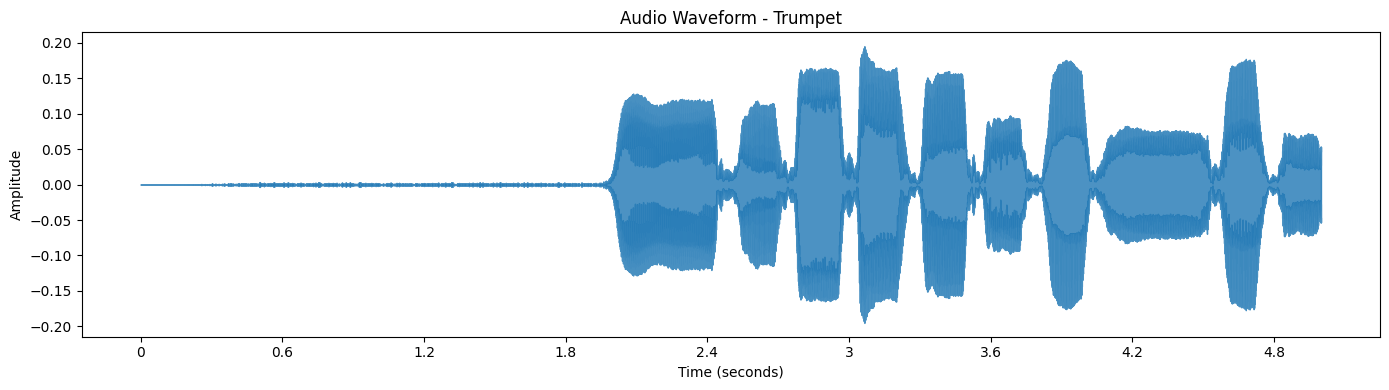

In [1]:
# Create a figure with a specific size
plt.figure(figsize=(14, 4))

# Plot the waveform using librosa's display function
librosa.display.waveshow(y, sr=sr, alpha=0.8)

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform - Trumpet')
plt.tight_layout()
plt.show()

## Step 4: Create a Spectrogram

A **spectrogram** shows frequency content over time. It reveals which pitches are present at each moment—information invisible in a simple waveform.

- **X-axis**: Time
- **Y-axis**: Frequency (pitch)
- **Color**: Intensity (loudness)

**Reading a spectrogram:**
- Horizontal lines = Sustained pitches or harmonics
- Bright spots = Loud frequency components
- Vertical stripes = Transients (attacks, percussive sounds)
- Multiple horizontal lines at regular intervals = Harmonic series of a pitched instrument

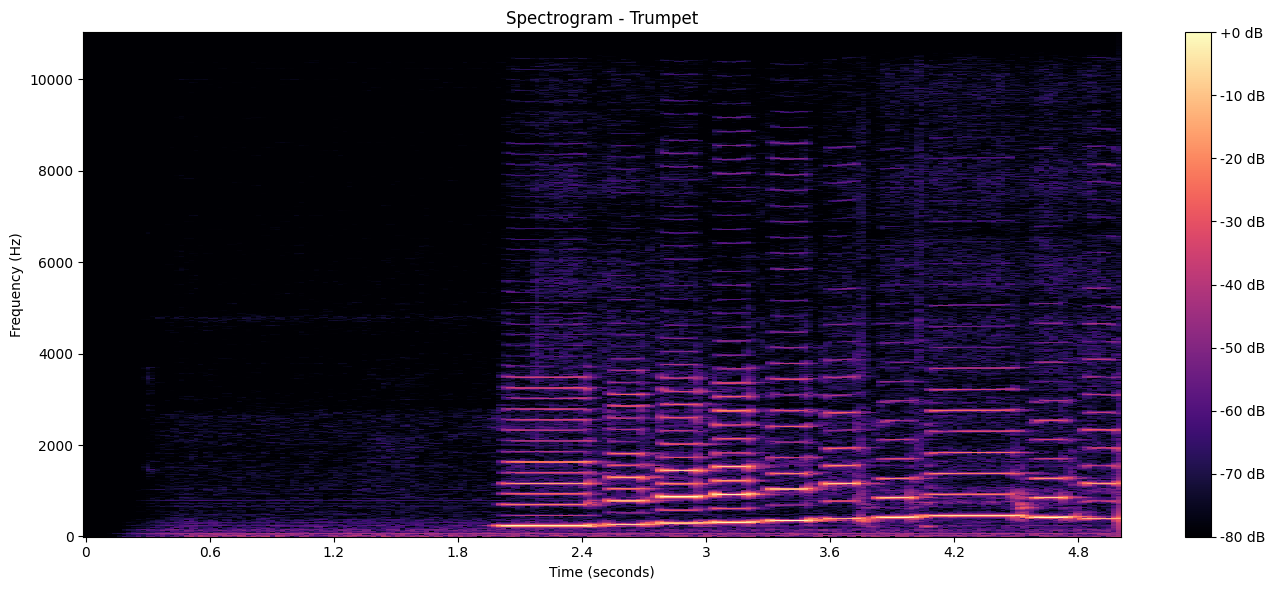

In [1]:
# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert amplitude to decibels for better visualization
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Create the spectrogram plot
plt.figure(figsize=(14, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram - Trumpet')
plt.tight_layout()
plt.show()

## Step 5: Create a Mel Spectrogram

A **Mel spectrogram** uses a frequency scale that better matches human hearing perception. We hear the difference between 100 Hz and 200 Hz more easily than between 5000 Hz and 5100 Hz, even though both are 100 Hz apart. The Mel scale accounts for this.

**Why use Mel spectrograms?**
- Better match to human perception of pitch
- Commonly used in machine learning for music classification
- Reduces data while keeping perceptually relevant information

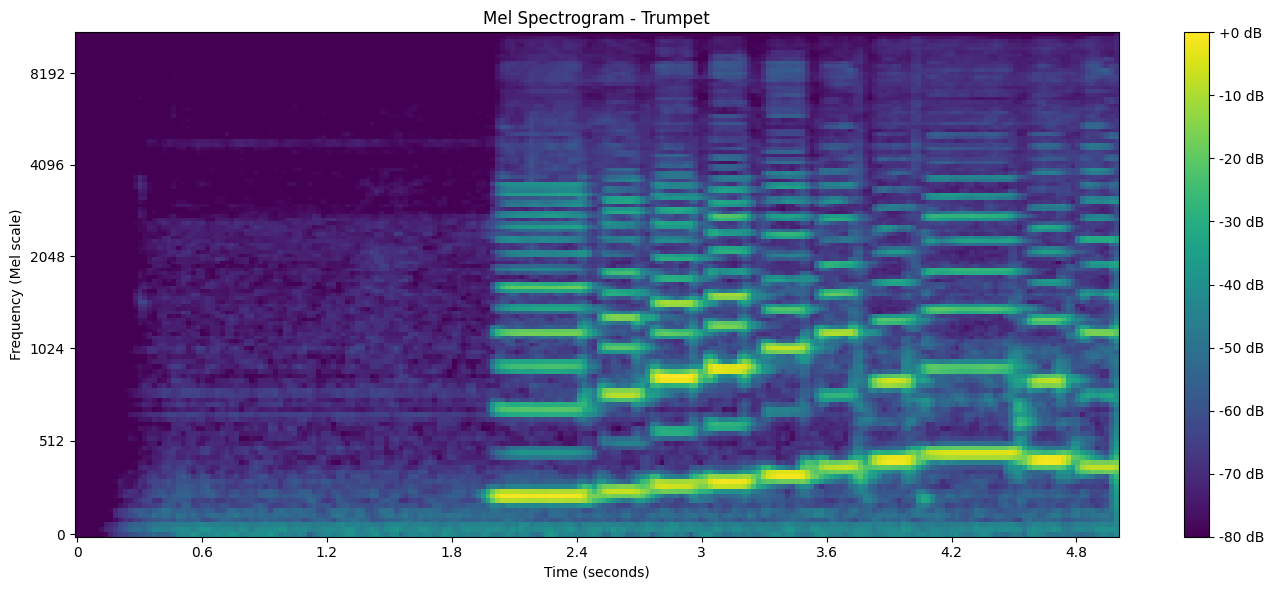

In [1]:
# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to decibels
S_db = librosa.power_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(14, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Mel scale)')
plt.title('Mel Spectrogram - Trumpet')
plt.tight_layout()
plt.show()

## Step 6: Upload Your Own Audio

You can upload your own audio file and analyze it! Run the cell below to open a file picker.

In [ ]:
# Upload a file from your computer
from google.colab import files

# This will open a file picker dialog
uploaded = files.upload()

# Get the filename (assuming one file uploaded)
if uploaded:
    filename = list(uploaded.keys())[0]

    # Load the uploaded audio
    y_custom, sr_custom = librosa.load(filename)

    # Print info and play
    print(f"\nLoaded: {filename}")
    print(f"Sample rate: {sr_custom} Hz")
    print(f"Duration: {len(y_custom) / sr_custom:.2f} seconds")
    Audio(y_custom, rate=sr_custom)

## Step 7: Complete Visualization Suite

Here's a complete script that creates all three visualizations side by side. You can modify the audio source variable to switch between the example audio and your uploaded file.

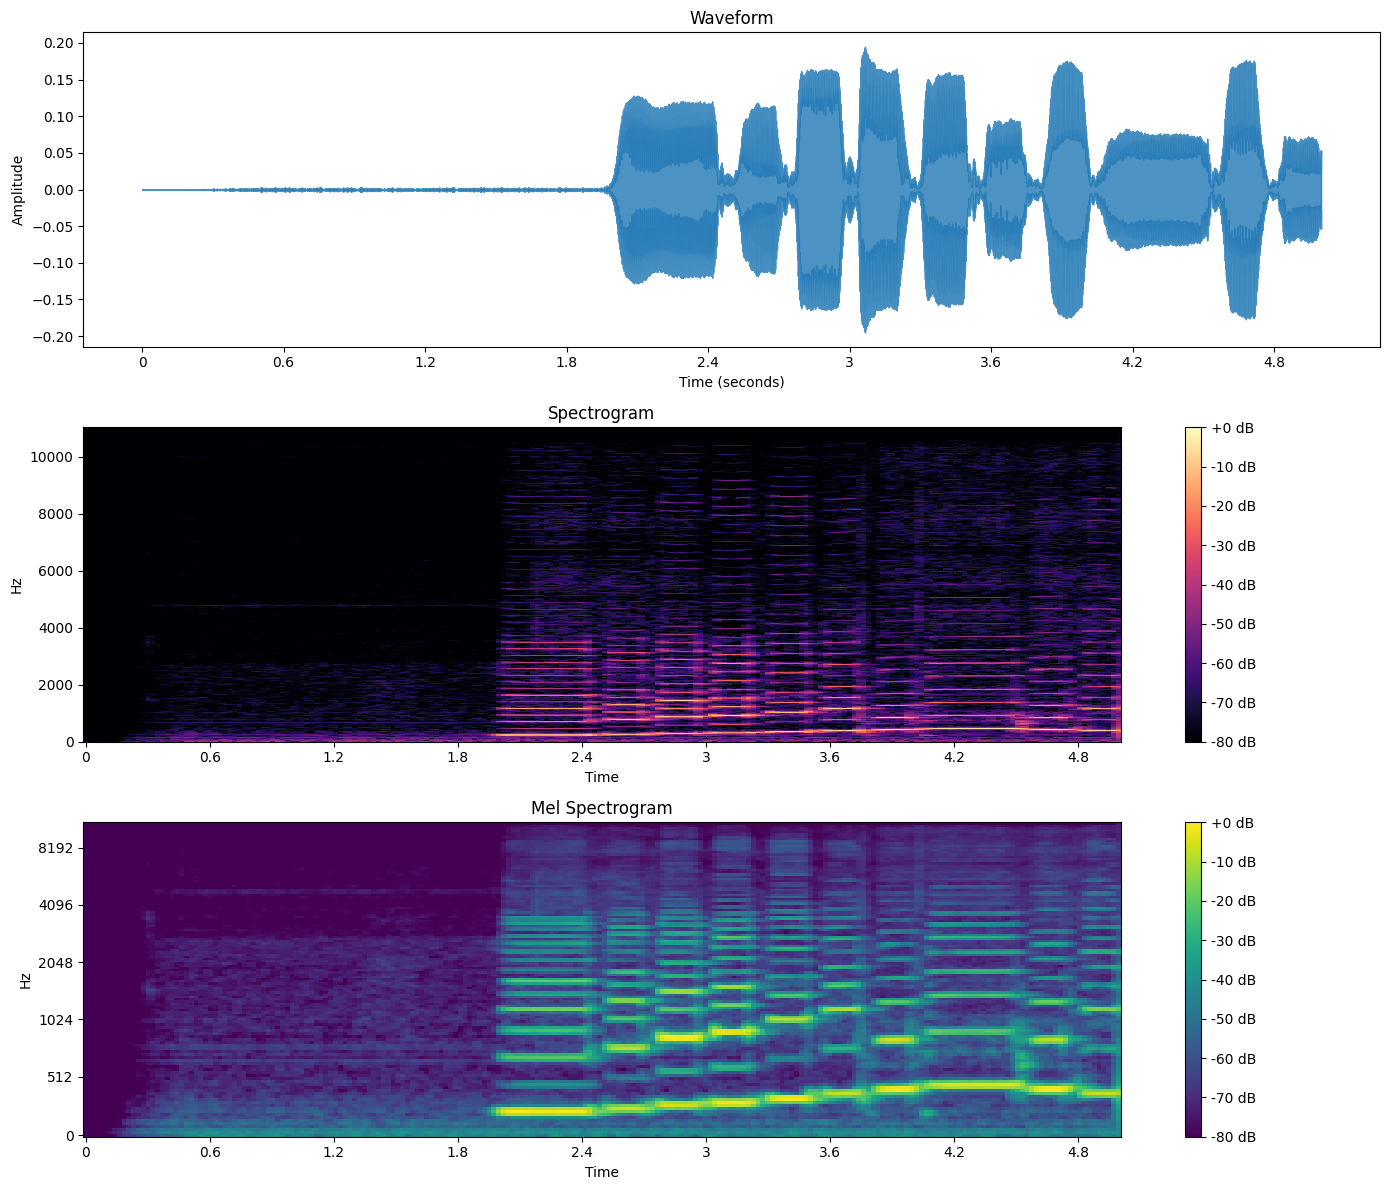

In [1]:
# Choose which audio to analyze (change to y_custom, sr_custom to use your uploaded file)
audio_data = y
sample_rate = sr

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# 1. Waveform
librosa.display.waveshow(audio_data, sr=sample_rate, ax=axes[0], alpha=0.8)
axes[0].set_title('Waveform')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Amplitude')

# 2. Spectrogram
D = librosa.stft(audio_data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='hz', ax=axes[1], cmap='magma')
axes[1].set_title('Spectrogram')
fig.colorbar(img1, ax=axes[1], format='%+2.0f dB')

# 3. Mel Spectrogram
S_mel = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_mels=128)
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)
img2 = librosa.display.specshow(S_mel_db, sr=sample_rate, x_axis='time', y_axis='mel', ax=axes[2], cmap='viridis')
axes[2].set_title('Mel Spectrogram')
fig.colorbar(img2, ax=axes[2], format='%+2.0f dB')

plt.tight_layout()
plt.show()

# Play the audio
Audio(audio_data, rate=sample_rate)

## Practice Exercises

Try these exercises to solidify your understanding:

1. **Load a different example**: Try `librosa.ex('nutcracker')` or `librosa.ex('choice')` instead of 'trumpet'
2. **Change the color map**: Replace 'magma' or 'viridis' with 'plasma', 'inferno', or 'coolwarm'
3. **Adjust the Mel bins**: Change `n_mels=128` to `n_mels=64` or `n_mels=256` and observe the difference
4. **Compare instruments**: Upload recordings of different instruments and compare their spectrograms

In [ ]:
# Your practice space - try the exercises here!

# Exercise 1: Load a different example
# y2, sr2 = librosa.load(librosa.ex('nutcracker'))

# Exercise 2 & 3: Experiment with visualization settings
# Add your code here!

## Key Concepts Summary

1. **Audio as data**: Audio is represented as numerical arrays (samples)
2. **Sample rate**: Determines audio resolution and quality (samples per second)
3. **Waveform**: Shows amplitude over time—the raw shape of sound
4. **Spectrogram**: Reveals frequency content over time via the Short-Time Fourier Transform
5. **Mel spectrogram**: Aligns with human pitch perception for more meaningful analysis

---

**Next tutorial**: Learn about beat detection and tempo analysis with librosa!